In [17]:
from __future__ import print_function, division
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

# some nice colors from http://colorbrewer2.org/
COLOR1 = '#7fc97f'
COLOR2 = '#beaed4'
COLOR3 = '#fdc086'
COLOR4 = '#ffff99'
COLOR5 = '#386cb0'

%matplotlib inline

In [3]:
np.random.seed(17)

Using scipy.stats.norm to represent the distribution

In [9]:
mu1, sig1 = 178, 7.7
male_height = scipy.stats.norm(mu1, sig1)

In [11]:
mu2, sig2 = 163, 7.3
female_height = scipy.stats.norm(mu2, sig2)

The following function evaluates the normal (Gaussian) probability density function (PDF) within 4 standard deviations of the mean. 
<br />It takes rv object and returns a pair of NumPy arrays.

In [12]:
def eval_pdf(rv, num=4):
    mean, std = rv.mean(), rv.std()
    xs = np.linspace(mean-num*std, mean+num*std)
    ys = rv.pdf(xs)
    return xs, ys

So, the two distribution looks like

Text(0.5,0,'Height(cm)')

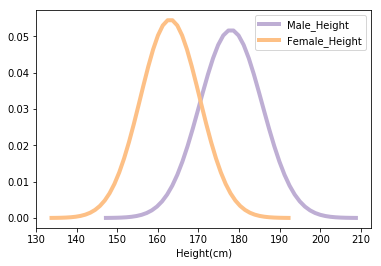

In [33]:
xs, ys = eval_pdf(male_height)
plt.plot(xs, ys, label='Male', linewidth =4, color=COLOR2)

xs, ys = eval_pdf(female_height)
plt.plot(xs, ys, label='Female', linewidth=4, color=COLOR3)
plt.legend(('Male_Height', 'Female_Height'), loc='upper right')
plt.xlabel('Height(cm)')

Use rvs to generate random samples from the population distributions. Note that these are totally random, totally representative samples, with no measurement error!

In [34]:
male_sample = male_height.rvs(100)
female_sample = female_height.rvs(100)

In [35]:
mean1, std1 = male_sample.mean(), male_sample.std()
mean1, std1

(178.10638301598465, 7.116965990374081)

In [36]:
mean2, std2 = female_sample.mean(), female_sample.std()
mean2, std2

(163.38460854518215, 7.234877318196113)

Now, there are many ways to describe the magnitude of the difference between these distributions. An obvious one is the difference in the means:

In [37]:
diff_in_mean = mean1 - mean2
diff_in_mean

14.721774470802501

On average men are 14-15 cm taller.
<br /><br />
There are a number of ways to quantify the difference between distributions. A simple option is to express the difference as a percentage of the mean.

In [39]:
relative_diff = diff_in_mean / male_sample
print(relative_diff * 100)

# A problem with relative differences is that you have to choose 
# which mean to express them relative to.

relative_diff = diff_in_mean / female_sample
print(relative_diff * 100)

[ 8.32306659  8.64838088  8.20559128  8.18593826  7.84083804  7.95338481
  8.09477432  8.1592876   8.14632008  8.44093232  8.15226402  8.14918672
  8.30054924  8.40058241  7.96440609  9.36579222  8.68349386  8.27824993
  7.69180238  7.70175069  8.10352575  8.14949654  8.35100596  8.12681716
  8.554528    8.67097433  8.43273064  8.18931894  7.97649962  8.12401497
  7.9237351   8.03269146  8.72353419  8.50209908  7.98635284  8.61400854
  8.29815415  8.5371647   7.54032128  8.3413308   8.20924442  8.61550852
  8.26368808  8.07076394  8.18726135  8.25862297  8.27320579  7.83812907
  7.92734361  7.95440833  8.07803327  8.01808658  8.11638491  9.31772623
  8.2462667   8.24710179  8.53685963  8.40108505  9.38583876  7.88596893
  8.27661861  7.94135157  9.17898636  8.24357882  8.14048388  8.58595964
  8.45376265  8.59843572  8.27753681  8.08778477  7.6720349   8.14798479
  8.29109358  8.26241698  8.30150392  8.23253297  8.05650201  7.86118461
  8.00053932  8.2801737   7.99181252  8.48756956  8